In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import norm
import math
from itertools import combinations
import matplotlib.pyplot as plt

## Randomised Assignment Procedure

In [ ]:
#Randomised Assignment Procedure
random.seed(1)
print(f"Shayer: {random.sample(range(0, 6), 3)}")

print(f"Wei Xuan: {random.sample(range(0, 2), 1)}")

print(f"Joshua: {random.sample(range(0, 4), 2)}")

print(f"Shen Kai: {random.sample(range(0, 2), 1)}")

print(f"Shan Shan: {random.sample(range(0, 2), 1)}")

Shayer: [1, 4, 0]
Wei Xuan: [1]
Joshua: [0, 1]
Shen Kai: [1]
Shan Shan: [1]


## Experimentation and Results

Reading in the csv

In [2]:
results_df = pd.read_csv('BT4212 Group 12 Input Data.csv')
display(results_df)

,Article Name/Link,Treatment,num_words,num_headers,num_keywords,TitleFlag,URLFlag,Indexed
0,LGBT Clubs in SG,1,381,3,6,1,0,0
1,Bar and Pub,1,499,0,6,1,0,0
2,Ultimate guide to partying,0,551,13,17,1,1,0
3,Nightclubs in SG,1,483,8,13,1,0,0
4,Dressing at parties,0,546,7,5,1,1,0
5,Throwing a party,0,559,6,15,1,0,0
6,Play Basketball,0,521,4,11,1,0,0
7,Shooting a basketball,1,737,3,7,1,0,1
8,Where to buy Kpop Merch,1,733,10,3,1,1,0
9,Album Review,1,765,2,2,1,1,0


Splitting into Features and Target

In [ ]:
X = results_df[['Treatment', 'num_words', 'num_headers', 'num_keywords', 'TitleFlag', 'URLFlag']]
y = results_df['Indexed']

In [ ]:
display(X)

,Treatment,num_words,num_headers,num_keywords,TitleFlag,URLFlag
0,1,381,3,6,1,0
1,1,499,0,6,1,0
2,0,551,13,17,1,1
3,1,483,8,13,1,0
4,0,546,7,5,1,1
5,0,559,6,15,1,0
6,0,521,4,11,1,0
7,1,737,3,7,1,0
8,1,733,10,3,1,1
9,1,765,2,2,1,1


In [ ]:
display(y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    1
12    0
13    1
14    1
15    1
Name: Indexed, dtype: int64

Logistic Regression

In [ ]:
# Train the logistic regression model
log_model = LogisticRegression(max_iter = 500, random_state= 0)
log_model.fit(X, y)

LogisticRegression(max_iter=500, random_state=0)

In [ ]:
# Interpret the log odds coefficients
log_odds = log_model.coef_[0]
print('log odds for Treatment:', log_odds)

log odds for Treatment: [ 0.26095659  0.00823663 -0.10138422  0.06663757 -0.41607421 -0.80511724]


In [ ]:
# Interpret the odds ratio
odds_ratio = np.exp(log_odds)
print('odds ratio for Treatment: ', odds_ratio)

odds ratio for Treatment:  [1.29817131 1.00827064 0.90358579 1.068908   0.65963132 0.44703551]


In [ ]:
# Get P_values
def logit_p_value(model, x):

    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 = coefs/se
    p1 = (1 - norm.cdf(abs(t1))) * 2
    return p1

p_values = logit_p_value(log_model, X)

# Create a table of the p-values
p_values_table = pd.DataFrame({'Feature': ['Const', 'Treatment', 'num_words', 'num_headers', 'num_keywords', 'TitleFlag', 'URLFlag'], 'P-value': p_values})
display(p_values_table)

,Feature,P-value
0,Const,0.179245
1,Treatment,0.871683
2,num_words,0.190052
3,num_headers,0.669528
4,num_keywords,0.521582
5,TitleFlag,0.829142
6,URLFlag,0.594802


## Fisher test for probabbilities

Null hypothesis: No association between the 2 variables
also known as "Whether the page has human written words has no association with the page being indexed"

Alternative hypothesis: The odds of the page being indexed is dependent on whether the page written with human words or purely by ChatGPT.

In [3]:
fisher = results_df[['Treatment','Indexed']]
fisher

,Treatment,Indexed
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,0
9,1,0


In [4]:
from scipy.stats import fisher_exact

fisher_matrix  = pd.crosstab(fisher['Treatment'], fisher['Indexed'])
fisher_matrix

Indexed,0,1
Treatment,,
0,6,2
1,5,3


In [5]:
odds_ratio, p_value = fisher_exact(fisher_matrix, alternative='greater')
print(f"Odds Ratio: {odds_ratio}")
print(f"P-value: {p_value}")

Odds Ratio: 1.8
P-value: 0.49999999999999994


Odds ratio of 1.8  
p-value of 0.49999999999999994 (assuming alternative is greater)

In [6]:
a = fisher_matrix[0][0]
b = fisher_matrix[1][0]
c = fisher_matrix[0][1]
d = fisher_matrix[1][1]

prob = (math.factorial(a + b) * math.factorial(c + d) * math.factorial(a + c) * math.factorial(b + d)) / (math.factorial(a) *  math.factorial(b) * math.factorial(c) * math.factorial(d) * math.factorial(a+ b + c + d))
prob

0.358974358974359

In [7]:
combinations_list_1 = list(combinations(fisher.index[:6], 3))
combinations_list_2 = list(combinations(fisher.index[6:8], 1))
combinations_list_3 = list(combinations(fisher.index[8:12], 2))
combinations_list_4 = list(combinations(fisher.index[12:14], 1))
combinations_list_5 = list(combinations(fisher.index[14:16], 1))

combis = []

for combi_1 in combinations_list_1:
    for combi_2 in combinations_list_2:
        for combi_3 in combinations_list_3:
            for combi_4 in combinations_list_4:
                for combi_5 in combinations_list_5:
                    combis += [combi_1 + combi_2 + combi_3 + combi_4 + combi_5]

In [8]:
cntrl = 0
treat = 0
tstat = []

for i in range(len(combis)):
    for j in range(len(fisher)):
        if j in combis[i]:
            treat += fisher['Indexed'][j]
        else:
            cntrl += fisher['Indexed'][j]
    tstat += [treat/8 - cntrl/8]
    treat = 0
    cntrl = 0

tstat_hat = 3/8 - 2/8
tstat_hat

0.125

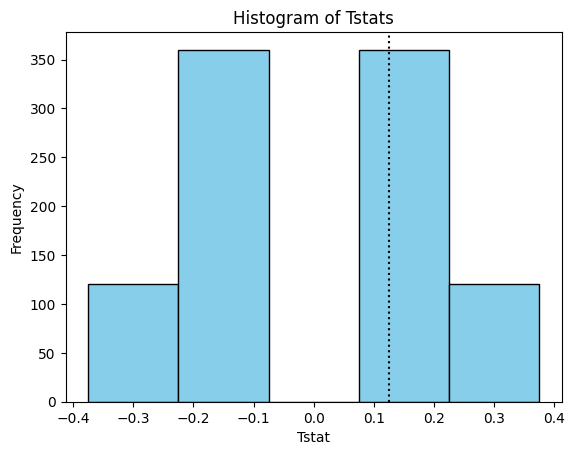

In [9]:
# Plotting the histogram
plt.hist(tstat, bins=5, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of Tstats')
plt.xlabel('Tstat')
plt.ylabel('Frequency')
plt.axvline(tstat_hat, c = 'black', ls = ':')

# Display the plot
plt.show()